In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file_path = "E:/PC/Documentos/GitHub/fourrier-analysis-of-weather-data/INMET_CO_DF_A001_BRASILIA_07-05-2000_A_31-12-2000.CSV"

df = pd.read_csv(file_path, sep=';',decimal=',', index_col=False)
df = df[["DATA (YYYY-MM-DD)","HORA (UTC)","TEMPERATURA M�NIMA NA HORA ANT. (AUT) (�C)", "TEMPERATURA M�XIMA NA HORA ANT. (AUT) (�C)"]]
df['datetime'] = pd.to_datetime(df['DATA (YYYY-MM-DD)'] + ' ' + df['HORA (UTC)'])
# df.set_index('datetime', inplace=True)
df.drop(columns=["DATA (YYYY-MM-DD)","HORA (UTC)"], inplace=True)
df.replace(-9999, np.nan, inplace=True)
df = df.dropna()
display(df)


,TEMPERATURA M�NIMA NA HORA ANT. (AUT) (�C),TEMPERATURA M�XIMA NA HORA ANT. (AUT) (�C),datetime
12,20.7,22.6,2000-05-07 12:00:00
13,22.5,24.2,2000-05-07 13:00:00
14,24.3,25.5,2000-05-07 14:00:00
15,25.0,27.4,2000-05-07 15:00:00
16,25.5,27.1,2000-05-07 16:00:00
...,...,...,...
5731,25.4,27.4,2000-12-31 19:00:00
5732,24.4,26.2,2000-12-31 20:00:00
5733,23.7,24.7,2000-12-31 21:00:00
5734,22.7,23.7,2000-12-31 22:00:00


In [4]:
def plot(df: object, col_name: str) -> None:
    plt.figure(figsize=(50, 6))

    # Plot the 'x' column
    plt.plot(df.index, df[col_name], marker='o', linestyle='-', label='x')

    # Plot the 'y' column
    # plt.plot(df.index, df["TEMPERATURA M�XIMA NA HORA ANT. (AUT) (�C)"], marker='s', linestyle='-', label='y')

    # Adding titles and labels
    plt.title('Plot of x and y with Index as X-axis')
    plt.xlabel('Index')
    plt.ylabel('Values')

    # Adding a legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

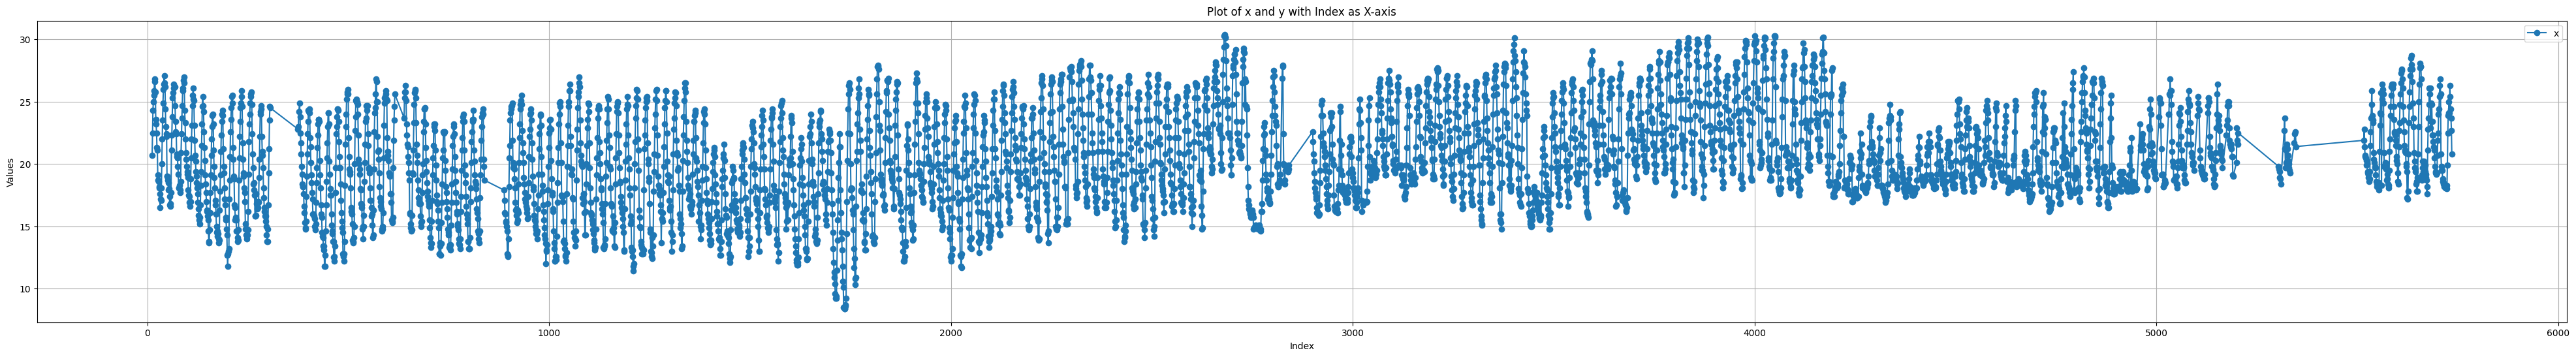

In [5]:
plot(df, "TEMPERATURA M�NIMA NA HORA ANT. (AUT) (�C)")

In [6]:
def plot_DFT(df: df, Colls: list) -> None:
    dft = np.fft.fft(df[Colls])

    # Compute the frequencies associated with the DFT
    n = len(df)
    frequencies = np.fft.fftfreq(n)

    # Plot the DFT
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, np.abs(dft))
    plt.title('Discrete Fourier Transform (DFT)')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

In [32]:
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

# Group by year and month and calculate the average of 'x' and 'y'
monthly_avg = df.groupby(['year', 'month'])[['TEMPERATURA M�NIMA NA HORA ANT. (AUT) (�C)', 'TEMPERATURA M�XIMA NA HORA ANT. (AUT) (�C)']].mean().reset_index()
monthly_avg['year_month'] = monthly_avg['year'].astype(str) + '-' + monthly_avg['month'].astype(str)
monthly_avg = monthly_avg.drop(columns=['year', 'month'])
# Set the year_month column as the index
monthly_avg.set_index('year_month', inplace=True)

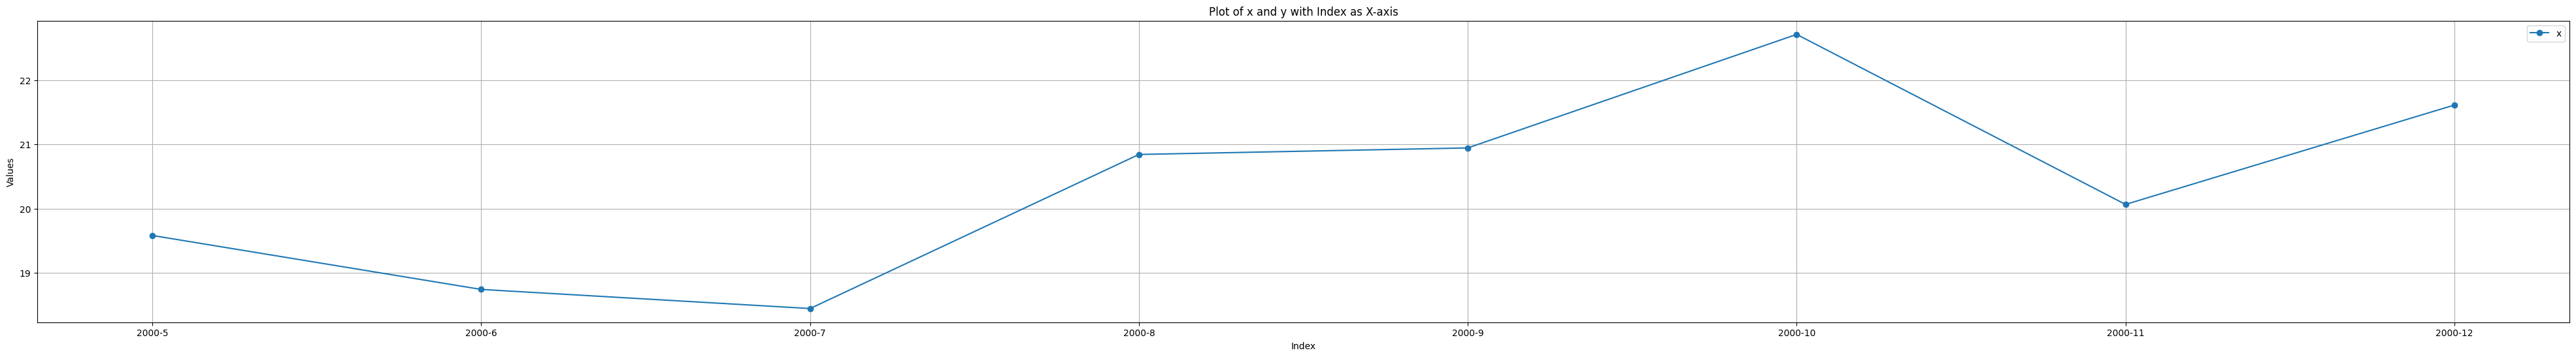

In [33]:
plot(monthly_avg, 'TEMPERATURA M�NIMA NA HORA ANT. (AUT) (�C)')